In [1]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 151s 1us/step


In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test=y_test.reshape(-1,)

In [10]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

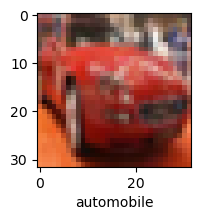

In [12]:
plot_sample(X_train, y_train, 5)

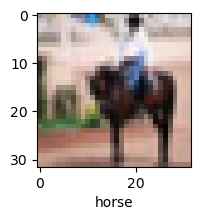

In [14]:
plot_sample(X_train, y_train, 11)

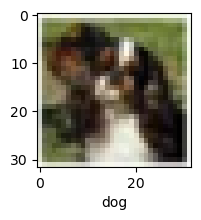

In [15]:
plot_sample(X_train, y_train, 500)

In [16]:
X_train=X_train/255.0
X_test=X_test/255.0

In [21]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
                   ])
ann.compile(optimizer='sgd', 
            loss="sparse_categorical_crossentropy",
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 33ms/step - accuracy: 0.3079 - loss: 1.9265
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.4244 - loss: 1.6402
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.4537 - loss: 1.5487
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.4758 - loss: 1.4862
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.4961 - loss: 1.4316


In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.59      0.52      0.55      1000
           1       0.56      0.68      0.61      1000
           2       0.42      0.31      0.36      1000
           3       0.40      0.17      0.24      1000
           4       0.56      0.23      0.33      1000
           5       0.35      0.53      0.42      1000
           6       0.42      0.72      0.54      1000
           7       0.58      0.50      0.54      1000
           8       0.63      0.61      0.62      1000
           9       0.49      0.61      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [25]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

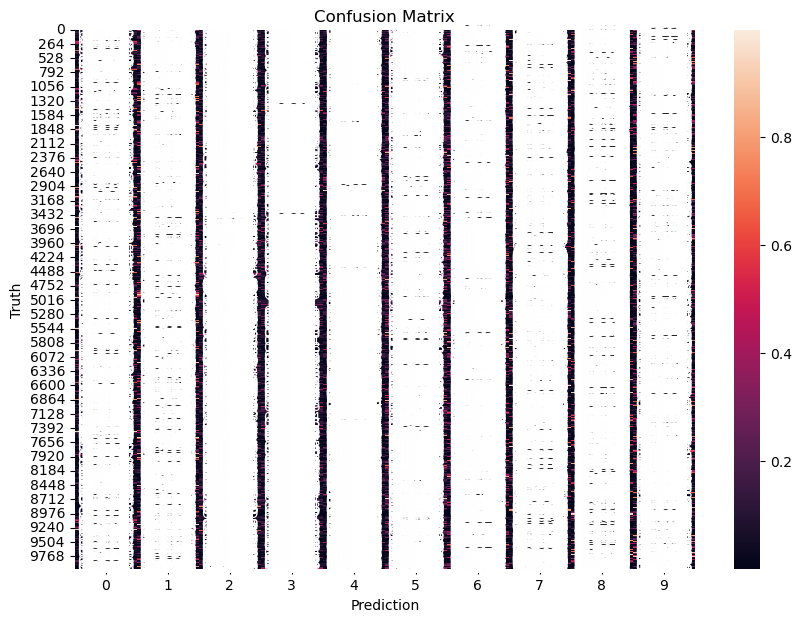

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(y_pred, annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show

In [29]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [49]:
cnn.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [50]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3685 - loss: 1.7324
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5792 - loss: 1.1994
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6318 - loss: 1.0601
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6599 - loss: 0.9827
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6791 - loss: 0.9141
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7022 - loss: 0.8602
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7165 - loss: 0.8117
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7274 - loss: 0.7823
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7347 - loss: 0.7504
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7470 - loss: 0.7107


In [51]:
 cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6954 - loss: 0.9106


[0.9304214715957642, 0.6866000294685364]

In [52]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[8.5239619e-04, 7.0886104e-05, 1.7224716e-03, 8.4328145e-01,
        5.2584619e-05, 1.5115406e-01, 2.0113280e-03, 3.4164049e-04,
        4.0088460e-04, 1.1245268e-04],
       [3.4669708e-03, 1.2097531e-02, 2.7066333e-06, 3.4994969e-07,
        6.4308615e-08, 4.1103045e-09, 3.4200511e-09, 6.1121415e-09,
        9.8434812e-01, 8.4085972e-05],
       [3.7733451e-01, 4.1682992e-02, 3.4225669e-03, 2.6316224e-03,
        4.0380722e-03, 1.9658676e-04, 1.8169239e-04, 7.6946861e-04,
        5.6245166e-01, 7.2908150e-03],
       [9.3972421e-01, 9.4269076e-03, 1.4439064e-02, 4.4591111e-04,
        5.7591964e-04, 1.8530543e-05, 1.6890202e-03, 3.6205380e-05,
        3.3458263e-02, 1.8597666e-04],
       [5.2081236e-06, 6.1701627e-05, 4.5361104e-03, 2.8672162e-02,
        6.4910209e-01, 2.2107500e-03, 3.1538481e-01, 4.4062303e-06,
        2.0902444e-05, 1.8986057e-06]], dtype=float32)

In [53]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [54]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

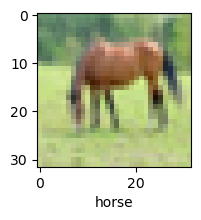

In [56]:
plot_sample(X_test, y_test,60)

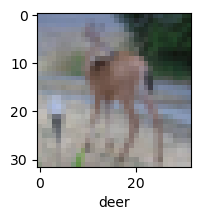

In [57]:
plot_sample(X_test, y_test,100) 